<a href="https://colab.research.google.com/github/mzamarron/MachineLearning/blob/main/DataAnalysis_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Human Resources dataset </center>

<center> The dataset revolves around a fictitious company and provides a variety of features that are useful for both data visualization AND creating machine learning / predictive analytics models.  

https://www.kaggle.com/datasets/rhuebner/human-resources-data-set </center>



```
Prediction task is to determine the biggest factors for termination.
```

***

## Library Import

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, ConfusionMatrixDisplay)
import warnings
warnings.filterwarnings("ignore")

## Data import

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MachineLearning/Datasets/HRDataset.csv',
                 parse_dates=['DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date'])

## Data exploration

In [4]:
print('Dataset dimension: ', df.shape)
df.head().T

Dataset dimension:  (311, 37)


,0,1,2,3,4
Employee_Name,"Adinolfi, Wilson K","Ait Sidi, Karthikeyan","Akinkuolie, Sarah","Alagbe,Trina","Anderson, Carol"
EmpID,10026,10084,10196,10088,10069
MarriedID,0,1,1,1,0
MaritalStatusID,0,1,1,1,2
GenderID,1,1,0,0,0
EmpStatusID,1,5,5,1,5
DeptID,5,3,5,5,5
PerfScoreID,4,3,3,3,3
FromDiversityJobFairID,0,0,0,0,0
Salary,62506,104437,64955,64991,50825


In [5]:
# Check for invalid data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [6]:
# Check if the dates were correctly parsed
df.select_dtypes(include='datetime').describe(datetime_is_numeric=True)

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date
count,311,311,104,311
mean,1979-02-06 09:48:02.315112544,2013-02-03 22:50:32.797427712,2015-06-14 11:46:09.230769152,2017-09-10 21:17:56.527331072
min,1951-01-02 00:00:00,2006-01-09 00:00:00,2010-08-30 00:00:00,2010-07-14 00:00:00
25%,1973-12-03 00:00:00,2011-07-11 00:00:00,2014-01-10 12:00:00,2016-03-19 12:00:00
50%,1980-09-30 00:00:00,2013-02-18 00:00:00,2015-09-22 00:00:00,2019-01-16 00:00:00
75%,1986-05-29 12:00:00,2014-09-23 12:00:00,2016-09-08 06:00:00,2019-02-04 00:00:00
max,1992-08-17 00:00:00,2018-07-09 00:00:00,2018-11-10 00:00:00,2019-02-28 00:00:00


# Data visualization

In [7]:
active_emp = df.query('EmploymentStatus=="Active"')
inactive_emp = df.query('EmploymentStatus!="Active"')

fig = go.Figure(go.Choropleth(locationmode = 'USA-states',
                              name='State/#Employees/Dept.',
                              locations = active_emp.groupby('US_State').Employee_Name.count().index,
                              z = active_emp.groupby('US_State').Employee_Name.count().values,
                              text = active_emp.groupby('US_State').Department.unique(),
                              colorscale = 'Darkmint',
                              colorbar=dict(title='number of<br>employees',
                                            title_font_size=12, thickness=12,
                                            tickmode='array',
                                            tickvals=[active_emp.groupby('US_State').Employee_Name.count().min(),
                                                      active_emp.groupby('US_State').Employee_Name.count().max()],
                                            tickfont_size=8, ticks='outside')))

fig.add_scattergeo(
    locationmode='USA-states',
    locations=active_emp.groupby('US_State').Employee_Name.count().index,
    text=active_emp.groupby("US_State").Employee_Name.count(),
    mode='text', hoverinfo='skip')

fig.update_layout(title = 'Employee location across US',
                  title_x=0.5,
                  margin=dict(t=50, l=0, r=0, b=0),
                  geo = dict(scope='usa'))

fig

In [8]:
positions = active_emp.groupby('Department').Position.value_counts(ascending=True
                    ).reset_index('Department').rename(columns={'Position':'Number'}
                                                      ).reset_index()

av_salary = active_emp.groupby(['Department', 'Position']).Salary.mean().round().reset_index()


fig = make_subplots(rows=1, cols=2,
                    shared_yaxes=True,
                    horizontal_spacing=0.01)

fig.add_trace(go.Bar(y=[positions['Department'], positions['Position']],
                       x=positions['Number'],
                       orientation='h',
                       text=positions['Number'],
                       textposition='auto', textangle=0,
                       hoverinfo='x+y'),
               1, 1)

fig.add_trace(go.Bar(y=[av_salary['Department'], av_salary['Position']],
                       x=av_salary['Salary'],
                       orientation='h',
                       text=av_salary['Salary'].apply(lambda x: '${:0,.0f}'.format(x)),
                       textposition='auto', textangle=0,
                       marker_color=av_salary['Salary'],
                       marker_colorscale='Viridis',
                       hoverinfo='text+y'),
               1, 2)

fig.update_layout(title='Number of Active Employees & Average Yearly Salary by Position',
                  title_x=0.5, showlegend=False,
                  margin=dict(t=50, l=0, r=0, b=0),
                  height=800)

fig


In [9]:
fig = px.histogram(df, x=df['Department'], y=df['EmpID'].value_counts(), color=df['EmploymentStatus'], barmode='group',
             width=1600, height=400)
fig.show()

In [10]:
fig = make_subplots(rows=1, cols=2,
                    shared_yaxes=True,
                    horizontal_spacing=0.01)

fig.add_trace(go.Bar(name='Active Employees per Manager',
                     y=active_emp.ManagerName.value_counts(ascending=True).index,
                     x=active_emp.ManagerName.value_counts(ascending=True),
                     orientation='h',
                     text=active_emp.ManagerName.value_counts(ascending=True),
                     textposition='outside',
                     hoverinfo='name+x+y'),
              1, 1)

fig.add_trace(go.Bar(name='Terminated Employees per Manager',
                     y=inactive_emp.ManagerName.value_counts().index,
                     x=inactive_emp.ManagerName.value_counts(),
                     orientation='h',
                     text=inactive_emp.ManagerName.value_counts(),
                     textposition='outside',
                     hoverinfo='name+x+y'),
              1, 2)

fig.update_layout(title='Number of Employees per Manager',
                  title_x=0.5,
                  margin=dict(t=50, l=0, r=0, b=0),
                  legend_orientation="h",
                  legend=dict(x=0.5, xanchor='left'),
                  height=600)

fig

In [11]:
ratio_left_total_position = ((inactive_emp.groupby('Position').Employee_Name.nunique() /
                              df.groupby('Position').Employee_Name.nunique()
                               ).dropna().sort_values()*100).round(1)

fig = px.bar(ratio_left_total_position, orientation='h',
             color=ratio_left_total_position,
             color_discrete_sequence=px.colors.qualitative.Antique,
             text=ratio_left_total_position.apply(lambda x: '{0:1.1f}%'.format(x)),
             title='Percentage of terminated employees by position',
             labels={'color':'% of<br>employees',
                     'value':'percent of employees'})

fig.update_traces(textfont_size=10, textangle=0,
                  textposition='outside',
                  hovertemplate = 'Percent of employees : %{text}<br>Position : %{y}')

fig.update_layout(title_x=0.5,
                  coloraxis_colorbar_thickness=12,
                  margin=dict(t=50, l=0, r=0, b=0))

fig

In [12]:
reasons = inactive_emp.TermReason.value_counts(ascending=True)

fig = px.bar(reasons, orientation='h',
             color=reasons.astype(str),
             color_discrete_sequence=px.colors.qualitative.Prism,
             text=reasons.index + ', ' + reasons.astype(str),
             title='Number of Employees by Termination Reason',
             labels={'value':'number of employees'})

fig.update_traces(textfont_size=12, textangle=0,
                  textposition='auto',
                  hovertemplate = 'Number of employees : %{x}<br>Reason : %{y}')

fig.update_layout(title_x=0.5, showlegend=False,
                  margin=dict(t=50, l=100, r=100, b=0))

fig.update_yaxes(showticklabels=False, title=None)

fig

In [13]:
left_by_dept = inactive_emp.groupby([df["DateofHire"].dt.year, 'Department']
                              ).Employee_Name.count().reset_index()

left_table = inactive_emp.groupby(df["DateofHire"].dt.year
                            ).Employee_Name.count().reset_index()

fig = px.bar(left_by_dept,
              x='DateofHire',
              y='Employee_Name', color='Department',
              color_discrete_sequence=px.colors.qualitative.G10,
              text='Employee_Name',
              title='Number of Hired Employees by Department',
              labels={'Employee_Name':'number of employees',
                      'DateofHire':'year of hiring'})

fig.update_traces(textfont_size=10,
                  textangle=0,
                  textposition='auto',
                  hoverinfo='x+y')

fig.add_trace(go.Table(header=dict(
                       values=['<b>Year of<br>Hiring</b>', '<b>Employees<br>Hired</b>'],
                       font_size=10, fill_color='palegoldenrod',
                       align='left'),
                       cells=dict(
                       values=left_table.values.T, align='left', fill_color='lavenderblush',
                       font_size=10
                           ), domain=dict(x=[0.03,0.25])))

fig.update_layout(title_x=0.5,
                  margin=dict(t=50, l=0, r=0, b=0))

fig

***

# Prediction

## Data preparation

In [14]:
df['YOB'] = df['DOB'].dt.year
df['YearofHire'] = df['DateofHire'].dt.year

categorical = ['Position', 'State', 'Sex',
               'MaritalDesc', 'CitizenDesc', 'Department',
               'ManagerName', 'PerformanceScore']
df[categorical] = df[categorical].astype('category')

## Defining variables

In [15]:
X = df[['Salary', 'YOB', 'EngagementSurvey', 'YearofHire', 'EmpSatisfaction',
        'Position', 'State', 'Sex', 'MaritalDesc', 'CitizenDesc', 'Department',
        'ManagerName', 'PerformanceScore']]

y = df['Termd']

## Model fitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

print('Train dataset dimension \n X:', X_train.shape,'y:', y_train.shape)
print('Test dataset dimension  \n X:', X_test.shape, 'y:', y_test.shape)

Train dataset dimension 
 X: (264, 13) y: (264,)
Test dataset dimension  
 X: (47, 13) y: (47,)


In [17]:
lgb = LGBMClassifier(objective = 'binary',
                     random_state=0)

In [18]:
grid = {'n_estimators' : range(10, 100, 10),
        'num_leaves' : range(2, 15, 2)}

lgb_cv = GridSearchCV(estimator = lgb,
                      param_grid = grid,
                      scoring = 'accuracy',
                      cv = 3)

lgb_cv.fit(X_train, y_train)

print('Best Estimator      :', lgb_cv.best_estimator_)
print('Best Accuracy Score :', lgb_cv.best_score_.round(3))

Best Estimator      : LGBMClassifier(n_estimators=80, num_leaves=2, objective='binary',
               random_state=0)
Best Accuracy Score : 0.742


In [19]:
predictions = lgb_cv.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('Test Accuracy Score :', accuracy.round(3))

Test Accuracy Score : 0.787


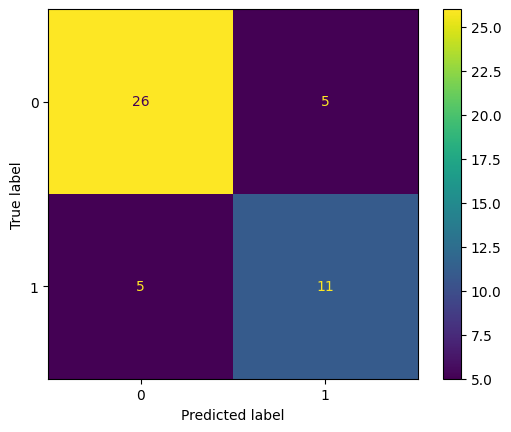

In [20]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot();

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.69      0.69      0.69        16

    accuracy                           0.79        47
   macro avg       0.76      0.76      0.76        47
weighted avg       0.79      0.79      0.79        47



## Insights

In [26]:
importances = pd.DataFrame(data={
        'attribute': X_train.columns,
        'importance': lgb_cv.best_estimator_.feature_importances_
        }).sort_values(by='importance',
                       ascending=True)

fig = px.bar(importances, orientation='h',
             y=importances['attribute'],
             x=importances['importance'],
             color=importances['importance'],
             color_continuous_scale='ylorrd',
             text=importances['importance'],
             title='Model Feature Importances',
             )

fig.update_traces(textfont_size=12, textangle=0,
                  textposition='inside'
                 )

fig.update_layout(title_x=0.5,
                  coloraxis_colorbar_thickness=12,
                  margin=dict(t=50, l=0, r=0, b=0))

fig.show()